In [ ]:
'''
TODO:
'''

# Importing relevant modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL # This is the Python Imaging Library, it allows images to be displayed.
import tensorflow as tf

from os import listdir
from os.path import isfile, join 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ensuring that matplotlib plots inline
%matplotlib inline

In [ ]:
from tensorflow.keras.applications import  resnet50, mobilenet_v2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# I seem to be having lots of problems with resnet & efficientnet. 
## It might be due to improper data preprocessing.

## resnet & efficientnet should return a good accuracy. 

## Potentially finding the std or mean of the input data and normalizing around those could hep accuracy as well.

In [ ]:
# The resnet50 model
resnet50_model = ResNet50(input_shape=(224, 224, 3), include_top=False)
resnet50_model.trainable = False

# The mobilenet model
'''
mobilenet_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
mobilenet_model.trainable = False 
'''

94773248/94765736 [==============================] - 1s 0us/step


"\nmobilenet_model = MobileNetV2(input_shape=(224, 224, 3), weights='imagenet', include_top=False)\nmobilenet_model.trainable = False \n"

# Mounting my Google Drive

In [ ]:
# Obtaining the contents of the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Other Classification models: Trying to download resnet18



In [ ]:
# Try this website for resnet34 https://github.com/qubvel/classification_models

! pip install git+https://github.com/qubvel/classification_models.git

In [ ]:
! pip install classification_models

In [ ]:
# for keras
#from classification_models.keras import Classifiers

# for tensorflow.keras
from classification_models import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')
model = ResNet18((380, 380, 3), weights='imagenet')

In [ ]:
!ls '/content/drive/My Drive/'

# Making the data generator

In [ ]:
# There are 20580 images in the dogs dataset

# datagen for resnet50 & mobilenet_model
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split = 0.4,
    preprocessing_function = preprocess_input)

# Attempting to make the data generator

In [ ]:
batch_size = 16
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

train_data_gen = datagen.flow_from_directory(batch_size=batch_size,
                                                     directory='/content/drive/My Drive/Images',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     color_mode="rgb",
                                                     class_mode='categorical',
                                                     subset = "training"
                                             )


valid_data_gen = datagen.flow_from_directory(batch_size=batch_size,
                                                     directory='/content/drive/My Drive/Images',
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     color_mode="rgb",
                                                     class_mode='categorical',
                                                     subset = "validation")

Found 12397 images belonging to 120 classes.
Found 8183 images belonging to 120 classes.


# Configuring the dataset for performance.

## This code loads the dataset from the disk without having I/O blocking.

In [ ]:
# I'm still not sure how this code works or whether it's good to use with 
# ImageDataGenerator.
'''
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_data_gen = train_data_gen.prefetch(buffer_size=AUTOTUNE)
valid_data_gen = valid_data_gen.prefetch(buffer_size=AUTOTUNE)
test_data_gen = test_data_gen.prefetch(buffer_size=AUTOTUNE)
'''

# Creating the Model

In [ ]:

# A training model using a pretrained base.

# mobilenet_model
'''
doggo_model = Sequential([
                          mobilenet_model,
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(120)
])
'''

# resnet50 model
doggo_model = Sequential([
                          resnet50_model,
                          layers.GlobalAveragePooling2D(),
                          layers.Dense(120)
])

# Old compilation using SparseCategoricalCrossentropy.

doggo_model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


"\ndoggo_model.compile(optimizer='adam',\n              loss=keras.losses.CategoricalCrossentropy(from_logits=True),\n              metrics=['accuracy'])\n"

# Attempting to train the model

In [ ]:

history = doggo_model.fit(
    train_data_gen,
    steps_per_epoch= 12348 // batch_size,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps= 8232 // batch_size
)


Epoch 1/10
771/771 [==============================] - 8248s 11s/step - loss: 2.9776 - accuracy: 0.3609 - val_loss: 1.4277 - val_accuracy: 0.6146
Epoch 2/10
771/771 [==============================] - 199s 257ms/step - loss: 1.0583 - accuracy: 0.7010
Epoch 3/10
771/771 [==============================] - 181s 235ms/step - loss: 0.8842 - accuracy: 0.7451
Epoch 4/10
771/771 [==============================] - 181s 234ms/step - loss: 0.7581 - accuracy: 0.7761
Epoch 5/10
771/771 [==============================] - 180s 234ms/step - loss: 0.6756 - accuracy: 0.8022
Epoch 6/10
771/771 [==============================] - 180s 234ms/step - loss: 0.6642 - accuracy: 0.8045
Epoch 7/10
771/771 [==============================] - 181s 234ms/step - loss: 0.5797 - accuracy: 0.8245
Epoch 8/10
771/771 [==============================] - 180s 233ms/step - loss: 0.5289 - accuracy: 0.8427
Epoch 9/10
771/771 [==============================] - 180s 234ms/step - loss: 0.5029 - accuracy: 0.8526
Epoch 10/10
771/771 [==

'\nhistory = doggo_model.fit(\n    train_data_gen,\n  \n    epochs=epochs,\n    validation_data=valid_data_gen,\n    \n)\n'

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Saving the model

In [ ]:
# Saving the entire model.
doggo_model.save('/content/drive/My Drive/Dog Classification Model/resnet50')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Dog Classification Model/resnet50/assets


In [ ]:
# Saving just the weights of the model.
doggo_model.save_weights('./content/drive/My Drive/Dog Classification Model')

# Loading the model

In [ ]:
# Loading the resnet50 model
model = tf.keras.models.load_model( '/content/drive/My Drive/Dog Classification Model/resnet50' )

# Loading the mobilenetv2 model
'''
model = tf.keras.models.load_model( '/content/drive/My Drive/Dog Classification Model/mobilenet_v2' )
'''

"\nmodel = tf.keras.models.load_model( '/content/drive/My Drive/Dog Classification Model/mobilenet_v2' )\n"

# Evaluating the model

In [ ]:
results = model.evaluate( train_data_gen )

print( results )

412/775 [==============>...............] - ETA: 40:57 - loss: 0.5033 - accuracy: 0.8527

KeyboardInterrupt: ignored

# Testing images

In [ ]:
img_height = 224
img_width = 224
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/My Drive/Images',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


## Displaying some images

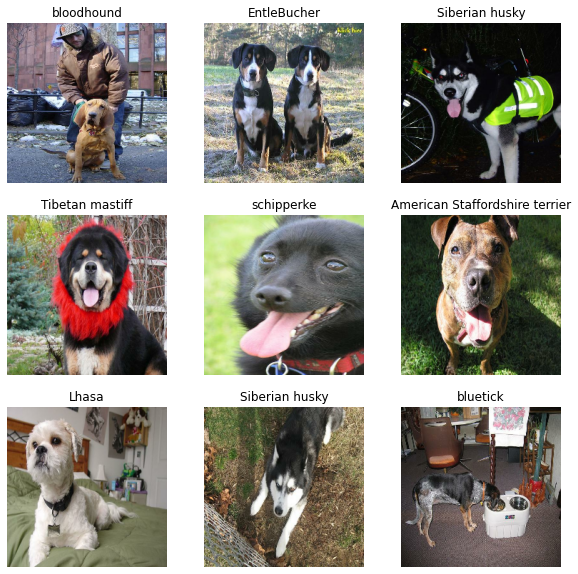

In [ ]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title( class_names[labels[i]][10:].replace( '_', ' ' ) )
    plt.axis("off")

## Making predictions using resnet50

  **These predictions seem far off the 85% accuracy**
  > There could be some problem within the body of the code or with the preprocessing.

In [ ]:
model.predict( train_ds )
class_names = train_ds.class_names

plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
  predictions = model.predict( images )

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    prediction = predictions[i]
    plt.imshow(images[i].numpy().astype("uint8"))
    max_index = np.where( prediction == max(prediction) )[0][0]
    
    title =  ( 'Predicted: ', class_names[max_index][10:].replace( '_', ' ' ), '\n Actual:', class_names[labels[i]][10:].replace( '_', ' ' ) )
    title = ''.join(title)
    plt.title( title )
    
    plt.axis("off")
  

# Fine-tuning the model

In [ ]:
# Making the entire model trainable, might have to do this in parts and recompile.
model.trainable = True

# Creating an early stopping callback.
Stopping_Callback = tf.keras.callbacks.EarlyStopping(
      monitor='accuracy', min_delta=0.01, patience=0, verbose=0,
      mode='auto', baseline=None, restore_best_weights=False
)

# Recompiling the model.
model.compile(optimizer= keras.optimizers.Adam(1e-6), # A very low learning rate
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch= 12348 // batch_size,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps= 8232 // batch_size,
    callbacks = Stopping_Callback
)

Epoch 1/10
771/771 [==============================] - 7588s 10s/step - loss: 0.6802 - accuracy: 0.8014 - val_loss: 1.6240 - val_accuracy: 0.6525
Epoch 2/10
771/771 [==============================] - 241s 312ms/step - loss: 0.6028 - accuracy: 0.8165
Epoch 3/10
771/771 [==============================] - 229s 297ms/step - loss: 0.4942 - accuracy: 0.8409
Epoch 4/10
771/771 [==============================] - 229s 297ms/step - loss: 0.4561 - accuracy: 0.8501
Epoch 5/10
771/771 [==============================] - 229s 297ms/step - loss: 0.4180 - accuracy: 0.8679
Epoch 6/10
771/771 [==============================] - 229s 297ms/step - loss: 0.4327 - accuracy: 0.8647


In [ ]:
metrics = model.evaluate(valid_data_gen)

512/512 [==============================] - 137s 267ms/step - loss: 1.3715 - accuracy: 0.6922


In [ ]:
print( metrics['accuracy'] )

TypeError: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(6), acc, label='Training Accuracy')
plt.plot(range(1), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(6), loss, label='Training Loss')
plt.plot(range(1), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print( val_acc, val_loss)

# Build a Pipeline that can test an arbritrary number of new dog images.

## I need to write code that fins the batch size in advance

In [ ]:
img_height = 224
img_width = 224

# Finding the number of files within the Test_Images folder
path, dirs, files = next(os.walk("/usr/lib"))
file_count = len(files)


test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input)

test_ds = test_datagen.flow_from_directory(batch_size=file_count,
                                                     directory='/content/drive/My Drive/Test_Images',
                                                     shuffle=False,
                                                     target_size=(img_height, img_width),
                                                     color_mode="rgb",
                                                     class_mode='categorical',
                                             )


Found 11 images belonging to 11 classes.


In [ ]:
# There's a problem here, this is not quite right.
print( file_count )

24


## There's an issue here, it may be that the colour is being lost hence causing misclassification between breeds that have the same form but different colour such as:

* Corgi & Cardigan
* Dalmation & Great Dane
* Kuvasz & Golden Retriever

## This indicates that there's a problem with the preprocessing of the images, I am using tf.keras.preprocessing.image_dataset_from_directory to load in the test images whereas I trained the network using datagen. I can't insert the preprocess step into the train_ds

# The images look positively demonic, potentially because they are preprocessed here.

## Find a way of accessing the image files in the drive, potentially through plt.

## There's a random error in here too, I'm not sure where that's from.

IndexError: ignored

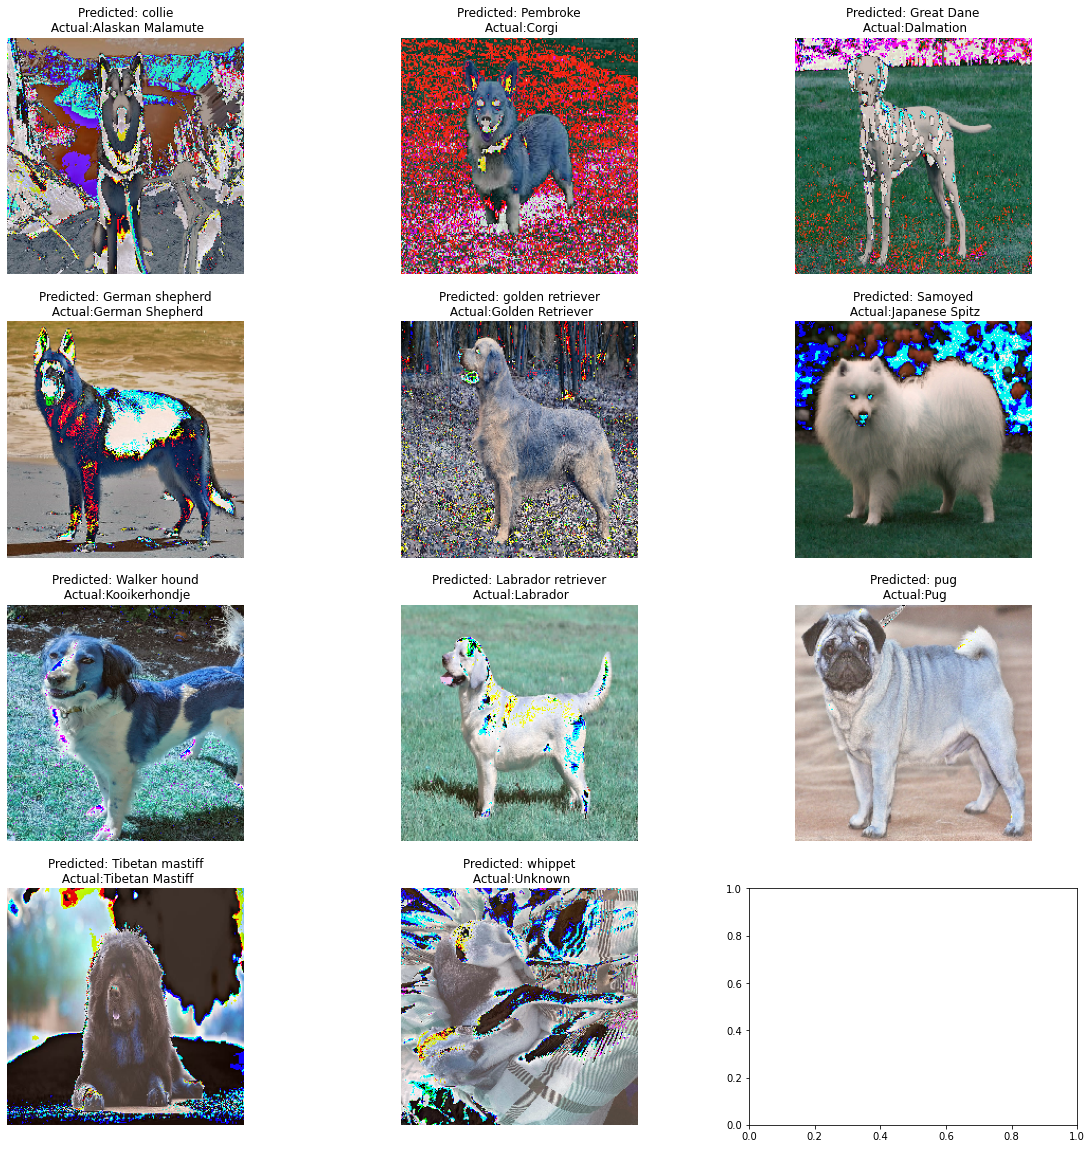

In [ ]:

# Storing the class names for the test dataset into a lsit 
test_class_names_dict = test_ds.class_indices
test_class_names = list( test_class_names_dict.keys() )

for i in range( len( test_class_names ) ):
  test_class_names[i] = test_class_names[i]

plt.figure(figsize=(20, 20))
for images, labels in test_ds:
  #predictions = model.predict( images )

  for i in range(file_count):
    ax = plt.subplot(4, 3, i + 1)
    prediction = predictions[i]
    #print(prediction)
    #plt.imshow(images[i].numpy().astype("uint8"))
    images[:, 0:224, 0:224] = images[:, 0:224, 0:224] + 17 * np.ones( (11, 224, 224, 3) )
    plt.imshow(images[i].astype("uint8"))
    max_index = np.where( prediction == max(prediction) )[0][0]
    
    # New (temporary) code using the train_data_gen to find the class names
    title =  ( 'Predicted: ', class_names[max_index],
              '\n Actual:', test_class_names[i] )
    title = ''.join(title)

    plt.title( title )
    
    plt.axis("off")


# Creating a file of class names

In [ ]:
# define list of the classified dog names
class_names_dict = train_data_gen.class_indices
class_names = list( class_names_dict.keys() )

for i in range( len( class_names ) ):
  class_names[i] = class_names[i][10:].replace( '_', ' ' )

print( class_names )
with open('/content/drive/My Drive/Dog Classification Model/class_names/class_names.txt', 'w') as filehandle:
    for listitem in class_names:
        filehandle.write('%s\n' % listitem)

['Chihuahua', 'Japanese spaniel', 'Maltese dog', 'Pekinese', 'Shih-Tzu', 'Blenheim spaniel', 'papillon', 'toy terrier', 'Rhodesian ridgeback', 'Afghan hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan coonhound', 'Walker hound', 'English foxhound', 'redbone', 'borzoi', 'Irish wolfhound', 'Italian greyhound', 'whippet', 'Ibizan hound', 'Norwegian elkhound', 'otterhound', 'Saluki', 'Scottish deerhound', 'Weimaraner', 'Staffordshire bullterrier', 'American Staffordshire terrier', 'Bedlington terrier', 'Border terrier', 'Kerry blue terrier', 'Irish terrier', 'Norfolk terrier', 'Norwich terrier', 'Yorkshire terrier', 'wire-haired fox terrier', 'Lakeland terrier', 'Sealyham terrier', 'Airedale', 'cairn', 'Australian terrier', 'Dandie Dinmont', 'Boston bull', 'miniature schnauzer', 'giant schnauzer', 'standard schnauzer', 'Scotch terrier', 'Tibetan terrier', 'silky terrier', 'soft-coated wheaten terrier', 'West Highland white terrier', 'Lhasa', 'flat-coated retriever', 'cur

# Attempting to read the file of dog names

In [ ]:
# define an empty list
class_names = []

# open file and read the content in a list
with open('/content/drive/My Drive/Dog Classification Model/class_names/class_names.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        dog_name = line[:-1]

        # add item to the list
        class_names.append( dog_name )


print( class_names )

['Chihuahua', 'Japanese spaniel', 'Maltese dog', 'Pekinese', 'Shih-Tzu', 'Blenheim spaniel', 'papillon', 'toy terrier', 'Rhodesian ridgeback', 'Afghan hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan coonhound', 'Walker hound', 'English foxhound', 'redbone', 'borzoi', 'Irish wolfhound', 'Italian greyhound', 'whippet', 'Ibizan hound', 'Norwegian elkhound', 'otterhound', 'Saluki', 'Scottish deerhound', 'Weimaraner', 'Staffordshire bullterrier', 'American Staffordshire terrier', 'Bedlington terrier', 'Border terrier', 'Kerry blue terrier', 'Irish terrier', 'Norfolk terrier', 'Norwich terrier', 'Yorkshire terrier', 'wire-haired fox terrier', 'Lakeland terrier', 'Sealyham terrier', 'Airedale', 'cairn', 'Australian terrier', 'Dandie Dinmont', 'Boston bull', 'miniature schnauzer', 'giant schnauzer', 'standard schnauzer', 'Scotch terrier', 'Tibetan terrier', 'silky terrier', 'soft-coated wheaten terrier', 'West Highland white terrier', 'Lhasa', 'flat-coated retriever', 'cur

# Making predictions on the images

In [ ]:
predictions = model.predict( test_ds )
print( predictions )

[[-23.70173  -46.66623  -29.966618 ... -23.602488 -31.287487 -38.170433]
 [-11.976673 -22.669743 -20.537819 ... -10.532807 -18.557768 -26.26067 ]
 [-16.522354 -24.067657 -19.927763 ... -20.586796 -20.057323 -15.896998]
 ...
 [-14.343258 -20.733406 -19.047703 ... -17.938536 -16.99194  -23.316702]
 [-32.49107  -37.417595 -26.289358 ... -39.93096  -27.398926 -27.464235]
 [-16.424845 -30.922325 -22.662785 ... -29.169811 -28.658484 -33.148735]]
